In [1]:
#importing required packages
import tensorflow
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

In [31]:
# Rescale the input image using ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [32]:
# preprocess all training images

train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

#preprocessing test images
validation_generator = validation_data_gen.flow_from_directory(
    'data/test',
    target_size=(48,48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [33]:
#model creation

model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(48,48,1)))
model1.add(Conv2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(128, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7, activation='softmax'))

In [34]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 128)      0         
 g2D)                                                 

In [35]:
cv2.ocl.setUseOpenCL(False)
model1.compile(
    loss = 'categorical_crossentropy',
    optimizer=Adam(lr =0.0001, decay = 1e-4),
    metrics= ['accuracy']
)

J:\C\Anaconda\envs\portfolio\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [36]:
early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, verbose=1)

In [37]:
%%time
history = model1.fit(
    train_generator,
    steps_per_epoch=28709//64,
    epochs=100,
    validation_data=validation_generator,
    validation_steps= 7178// 64,
    callbacks = [early_stopping_callbacks, tqdm_callback]
)

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

Epoch 1/100


0/448           ETA: ?s - 

Epoch 1/100
448/448 [==============================] - 125s 275ms/step - loss: 1.8154 - accuracy: 0.2517 - val_loss: 1.7947 - val_accuracy: 0.2879
Epoch 2/100


0/448           ETA: ?s - 

Epoch 2/100
448/448 [==============================] - 10s 22ms/step - loss: 1.6717 - accuracy: 0.3424 - val_loss: 1.5736 - val_accuracy: 0.4039
Epoch 3/100


0/448           ETA: ?s - 

Epoch 3/100
448/448 [==============================] - 10s 21ms/step - loss: 1.5485 - accuracy: 0.4009 - val_loss: 1.4801 - val_accuracy: 0.4361
Epoch 4/100


0/448           ETA: ?s - 

Epoch 4/100
448/448 [==============================] - 10s 21ms/step - loss: 1.4795 - accuracy: 0.4326 - val_loss: 1.4176 - val_accuracy: 0.4574
Epoch 5/100


0/448           ETA: ?s - 

Epoch 5/100
448/448 [==============================] - 10s 21ms/step - loss: 1.4206 - accuracy: 0.4558 - val_loss: 1.3672 - val_accuracy: 0.4845
Epoch 6/100


0/448           ETA: ?s - 

Epoch 6/100
448/448 [==============================] - 10s 21ms/step - loss: 1.3732 - accuracy: 0.4767 - val_loss: 1.3470 - val_accuracy: 0.4911
Epoch 7/100


0/448           ETA: ?s - 

Epoch 7/100
448/448 [==============================] - 10s 21ms/step - loss: 1.3329 - accuracy: 0.4952 - val_loss: 1.2981 - val_accuracy: 0.5093
Epoch 8/100


0/448           ETA: ?s - 

Epoch 8/100
448/448 [==============================] - 9s 21ms/step - loss: 1.2943 - accuracy: 0.5104 - val_loss: 1.2714 - val_accuracy: 0.5184
Epoch 9/100


0/448           ETA: ?s - 

Epoch 9/100
448/448 [==============================] - 10s 22ms/step - loss: 1.2693 - accuracy: 0.5211 - val_loss: 1.2584 - val_accuracy: 0.5198
Epoch 10/100


0/448           ETA: ?s - 

Epoch 10/100
448/448 [==============================] - 10s 21ms/step - loss: 1.2414 - accuracy: 0.5321 - val_loss: 1.2273 - val_accuracy: 0.5347
Epoch 11/100


0/448           ETA: ?s - 

Epoch 11/100
448/448 [==============================] - 10s 22ms/step - loss: 1.2143 - accuracy: 0.5459 - val_loss: 1.2100 - val_accuracy: 0.5428
Epoch 12/100


0/448           ETA: ?s - 

Epoch 12/100
448/448 [==============================] - 10s 22ms/step - loss: 1.1938 - accuracy: 0.5506 - val_loss: 1.2055 - val_accuracy: 0.5453
Epoch 13/100


0/448           ETA: ?s - 

Epoch 13/100
448/448 [==============================] - 10s 22ms/step - loss: 1.1671 - accuracy: 0.5629 - val_loss: 1.1861 - val_accuracy: 0.5566
Epoch 14/100


0/448           ETA: ?s - 

Epoch 14/100
448/448 [==============================] - 10s 22ms/step - loss: 1.1552 - accuracy: 0.5685 - val_loss: 1.1692 - val_accuracy: 0.5601
Epoch 15/100


0/448           ETA: ?s - 

Epoch 15/100
448/448 [==============================] - 10s 22ms/step - loss: 1.1348 - accuracy: 0.5776 - val_loss: 1.1650 - val_accuracy: 0.5610
Epoch 16/100


0/448           ETA: ?s - 

Epoch 16/100
448/448 [==============================] - 9s 21ms/step - loss: 1.1198 - accuracy: 0.5804 - val_loss: 1.1483 - val_accuracy: 0.5684
Epoch 17/100


0/448           ETA: ?s - 

Epoch 17/100
448/448 [==============================] - 10s 22ms/step - loss: 1.1040 - accuracy: 0.5867 - val_loss: 1.1394 - val_accuracy: 0.5741
Epoch 18/100


0/448           ETA: ?s - 

Epoch 18/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0890 - accuracy: 0.5954 - val_loss: 1.1340 - val_accuracy: 0.5792
Epoch 19/100


0/448           ETA: ?s - 

Epoch 19/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0763 - accuracy: 0.6000 - val_loss: 1.1249 - val_accuracy: 0.5787
Epoch 20/100


0/448           ETA: ?s - 

Epoch 20/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0623 - accuracy: 0.6048 - val_loss: 1.1233 - val_accuracy: 0.5787
Epoch 21/100


0/448           ETA: ?s - 

Epoch 21/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0506 - accuracy: 0.6076 - val_loss: 1.1223 - val_accuracy: 0.5785
Epoch 22/100


0/448           ETA: ?s - 

Epoch 22/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0360 - accuracy: 0.6166 - val_loss: 1.1119 - val_accuracy: 0.5843
Epoch 23/100


0/448           ETA: ?s - 

Epoch 23/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0223 - accuracy: 0.6230 - val_loss: 1.1083 - val_accuracy: 0.5848
Epoch 24/100


0/448           ETA: ?s - 

Epoch 24/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0074 - accuracy: 0.6278 - val_loss: 1.1000 - val_accuracy: 0.5928
Epoch 25/100


0/448           ETA: ?s - 

Epoch 25/100
448/448 [==============================] - 9s 20ms/step - loss: 1.0015 - accuracy: 0.6304 - val_loss: 1.0990 - val_accuracy: 0.5904
Epoch 26/100


0/448           ETA: ?s - 

Epoch 26/100
448/448 [==============================] - 9s 20ms/step - loss: 0.9884 - accuracy: 0.6338 - val_loss: 1.0928 - val_accuracy: 0.5956
Epoch 27/100


0/448           ETA: ?s - 

Epoch 27/100
448/448 [==============================] - 9s 20ms/step - loss: 0.9771 - accuracy: 0.6362 - val_loss: 1.0925 - val_accuracy: 0.5940
Epoch 28/100


0/448           ETA: ?s - 

Epoch 28/100
448/448 [==============================] - 9s 20ms/step - loss: 0.9695 - accuracy: 0.6413 - val_loss: 1.0920 - val_accuracy: 0.5960
Epoch 29/100


0/448           ETA: ?s - 

Epoch 29/100
448/448 [==============================] - 10s 22ms/step - loss: 0.9528 - accuracy: 0.6473 - val_loss: 1.0825 - val_accuracy: 0.6010
Epoch 30/100


0/448           ETA: ?s - 

Epoch 30/100
448/448 [==============================] - 10s 23ms/step - loss: 0.9472 - accuracy: 0.6506 - val_loss: 1.0827 - val_accuracy: 0.5995
Epoch 31/100


0/448           ETA: ?s - 

Epoch 31/100
448/448 [==============================] - 11s 24ms/step - loss: 0.9351 - accuracy: 0.6529 - val_loss: 1.0906 - val_accuracy: 0.5965
Epoch 32/100


0/448           ETA: ?s - 

Epoch 32/100
448/448 [==============================] - 11s 25ms/step - loss: 0.9242 - accuracy: 0.6593 - val_loss: 1.0811 - val_accuracy: 0.5958
Epoch 33/100


0/448           ETA: ?s - 

Epoch 33/100
448/448 [==============================] - 12s 27ms/step - loss: 0.9108 - accuracy: 0.6633 - val_loss: 1.0805 - val_accuracy: 0.5988
Epoch 34/100


0/448           ETA: ?s - 

Epoch 34/100
448/448 [==============================] - 11s 25ms/step - loss: 0.9064 - accuracy: 0.6664 - val_loss: 1.0714 - val_accuracy: 0.6087
Epoch 35/100


0/448           ETA: ?s - 

Epoch 35/100
448/448 [==============================] - 11s 25ms/step - loss: 0.8932 - accuracy: 0.6751 - val_loss: 1.0693 - val_accuracy: 0.6076
Epoch 36/100


0/448           ETA: ?s - 

Epoch 36/100
448/448 [==============================] - 11s 26ms/step - loss: 0.8912 - accuracy: 0.6704 - val_loss: 1.0773 - val_accuracy: 0.6048
Epoch 37/100


0/448           ETA: ?s - 

Epoch 37/100
448/448 [==============================] - 12s 26ms/step - loss: 0.8751 - accuracy: 0.6833 - val_loss: 1.0675 - val_accuracy: 0.6059
Epoch 38/100


0/448           ETA: ?s - 

Epoch 38/100
448/448 [==============================] - 11s 24ms/step - loss: 0.8676 - accuracy: 0.6804 - val_loss: 1.0698 - val_accuracy: 0.6117
Epoch 39/100


0/448           ETA: ?s - 

Epoch 39/100
448/448 [==============================] - 11s 24ms/step - loss: 0.8590 - accuracy: 0.6836 - val_loss: 1.0648 - val_accuracy: 0.6110
Epoch 40/100


0/448           ETA: ?s - 

Epoch 40/100
448/448 [==============================] - 11s 24ms/step - loss: 0.8514 - accuracy: 0.6899 - val_loss: 1.0633 - val_accuracy: 0.6126
Epoch 41/100


0/448           ETA: ?s - 

Epoch 41/100
448/448 [==============================] - 10s 23ms/step - loss: 0.8425 - accuracy: 0.6915 - val_loss: 1.0604 - val_accuracy: 0.6129
Epoch 42/100


0/448           ETA: ?s - 

Epoch 42/100
448/448 [==============================] - 11s 24ms/step - loss: 0.8367 - accuracy: 0.6933 - val_loss: 1.0624 - val_accuracy: 0.6112
Epoch 43/100


0/448           ETA: ?s - 

Epoch 43/100
448/448 [==============================] - 11s 24ms/step - loss: 0.8188 - accuracy: 0.7018 - val_loss: 1.0613 - val_accuracy: 0.6150
Epoch 44/100


0/448           ETA: ?s - 

Epoch 44/100
448/448 [==============================] - 10s 23ms/step - loss: 0.8210 - accuracy: 0.6988 - val_loss: 1.0682 - val_accuracy: 0.6151
Epoch 45/100


0/448           ETA: ?s - 

Epoch 45/100
448/448 [==============================] - 11s 23ms/step - loss: 0.8083 - accuracy: 0.7034 - val_loss: 1.0618 - val_accuracy: 0.6144
Epoch 46/100


0/448           ETA: ?s - 

Epoch 46/100
448/448 [==============================] - 10s 23ms/step - loss: 0.7933 - accuracy: 0.7086 - val_loss: 1.0635 - val_accuracy: 0.6169
Epoch 47/100


0/448           ETA: ?s - 

Epoch 47/100
448/448 [==============================] - 10s 23ms/step - loss: 0.7926 - accuracy: 0.7099 - val_loss: 1.0611 - val_accuracy: 0.6159
Epoch 48/100


0/448           ETA: ?s - 

Epoch 48/100
448/448 [==============================] - 10s 23ms/step - loss: 0.7808 - accuracy: 0.7141 - val_loss: 1.0592 - val_accuracy: 0.6172
Epoch 49/100


0/448           ETA: ?s - 

Epoch 49/100
448/448 [==============================] - 10s 23ms/step - loss: 0.7735 - accuracy: 0.7169 - val_loss: 1.0574 - val_accuracy: 0.6158
Epoch 50/100


0/448           ETA: ?s - 

Epoch 50/100
448/448 [==============================] - 10s 22ms/step - loss: 0.7633 - accuracy: 0.7227 - val_loss: 1.0589 - val_accuracy: 0.6179
Epoch 51/100


0/448           ETA: ?s - 

Epoch 51/100
448/448 [==============================] - 10s 23ms/step - loss: 0.7638 - accuracy: 0.7185 - val_loss: 1.0566 - val_accuracy: 0.6193
Epoch 52/100


0/448           ETA: ?s - 

Epoch 52/100
448/448 [==============================] - 10s 22ms/step - loss: 0.7513 - accuracy: 0.7252 - val_loss: 1.0581 - val_accuracy: 0.6187
Epoch 53/100


0/448           ETA: ?s - 

Epoch 53/100
448/448 [==============================] - 10s 22ms/step - loss: 0.7440 - accuracy: 0.7322 - val_loss: 1.0627 - val_accuracy: 0.6219
Epoch 54/100


0/448           ETA: ?s - 

Epoch 54/100
448/448 [==============================] - 10s 23ms/step - loss: 0.7314 - accuracy: 0.7343 - val_loss: 1.0587 - val_accuracy: 0.6196
Epoch 55/100


0/448           ETA: ?s - 

Epoch 55/100
448/448 [==============================] - 10s 23ms/step - loss: 0.7306 - accuracy: 0.7316 - val_loss: 1.0607 - val_accuracy: 0.6182
Epoch 56/100


0/448           ETA: ?s - 

Epoch 56/100
448/448 [==============================] - 10s 22ms/step - loss: 0.7203 - accuracy: 0.7362 - val_loss: 1.0632 - val_accuracy: 0.6249
Epoch 57/100


0/448           ETA: ?s - 

Epoch 57/100
448/448 [==============================] - 10s 22ms/step - loss: 0.7208 - accuracy: 0.7375 - val_loss: 1.0606 - val_accuracy: 0.6226
Epoch 58/100


0/448           ETA: ?s - 

Epoch 58/100
448/448 [==============================] - 10s 21ms/step - loss: 0.7152 - accuracy: 0.7388 - val_loss: 1.0584 - val_accuracy: 0.6226
Epoch 59/100


0/448           ETA: ?s - 

Epoch 59/100
448/448 [==============================] - 10s 22ms/step - loss: 0.6956 - accuracy: 0.7466 - val_loss: 1.0622 - val_accuracy: 0.6233
Epoch 60/100


0/448           ETA: ?s - 

Epoch 60/100
448/448 [==============================] - 10s 22ms/step - loss: 0.6925 - accuracy: 0.7478 - val_loss: 1.0669 - val_accuracy: 0.6223
Epoch 61/100


0/448           ETA: ?s - 

Epoch 61/100
448/448 [==============================] - 10s 23ms/step - loss: 0.6890 - accuracy: 0.7494 - val_loss: 1.0596 - val_accuracy: 0.6236
Epoch 62/100


0/448           ETA: ?s - 

Epoch 62/100
448/448 [==============================] - 10s 22ms/step - loss: 0.6827 - accuracy: 0.7529 - val_loss: 1.0662 - val_accuracy: 0.6217
Epoch 63/100


0/448           ETA: ?s - 

Epoch 63/100
448/448 [==============================] - 10s 21ms/step - loss: 0.6790 - accuracy: 0.7530 - val_loss: 1.0720 - val_accuracy: 0.6215
Epoch 64/100


0/448           ETA: ?s - 

Epoch 64/100
448/448 [==============================] - 10s 21ms/step - loss: 0.6758 - accuracy: 0.7562 - val_loss: 1.0641 - val_accuracy: 0.6218
Epoch 65/100


0/448           ETA: ?s - 

Epoch 65/100
448/448 [==============================] - 10s 22ms/step - loss: 0.6634 - accuracy: 0.7593 - val_loss: 1.0647 - val_accuracy: 0.6243
Epoch 66/100


0/448           ETA: ?s - 

Epoch 66/100
448/448 [==============================] - 10s 22ms/step - loss: 0.6630 - accuracy: 0.7599 - val_loss: 1.0657 - val_accuracy: 0.6244
Epoch 66: early stopping
Wall time: 12min 59s


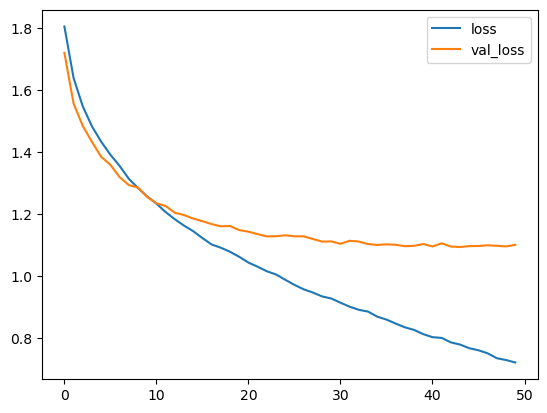

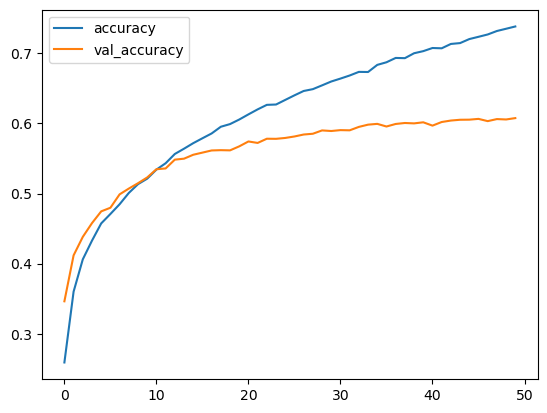

In [18]:
# Plot learning curves

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

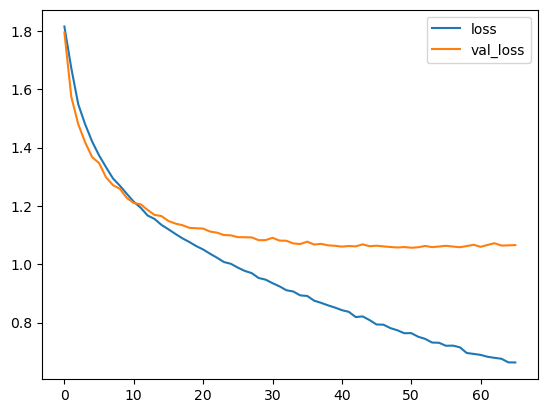

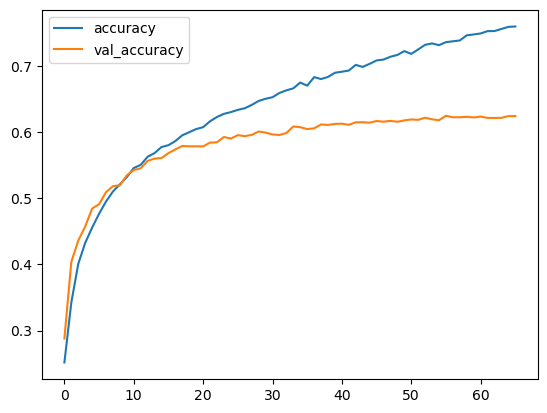

In [38]:
# Plot learning curves

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## Saving the model

In [39]:
model_59_json = model1.to_json()
with open('data/model_59.json', 'w') as json_file:
    json_file.write(model_59_json)

model1.save_weights('data/model_59_weights.h5')

In [13]:
base_model2 = tensorflow.keras.applications.ResNet50V2(weights='imagenet',
                                                       input_shape=(48,48,3),
                                                       include_top= False,
                                                       pooling = "max",
                                                       classes = 7)

In [14]:
model_resnet = Sequential()
model_resnet.add(base_model2)
model_resnet.add(Flatten())

model_resnet.add(Dense(128, activation = 'relu'))
model_resnet.add(Dense(64, activation = 'relu'))
model_resnet.add(Dense(32, activation = 'relu'))
model_resnet.add(Dense(7, activation = 'sigmoid'))

for layer in base_model2.layers:
    layer.trainable = False

model_resnet.compile(optimizer = 'adam',
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [16]:
%%time
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history_resnet = model_resnet.fit(train_generator,
                                  epochs = 50,
                                  validation_data = validation_generator,
                                  steps_per_epoch = 28709//64,
                                  validation_steps= 7178// 64,
                                  callbacks = [early_stopping_callbacks, tqdm_callback])

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/448           ETA: ?s - 

Epoch 1/50
448/448 [==============================] - 29s 64ms/step - loss: 1.5190 - accuracy: 0.4117 - val_loss: 1.5404 - val_accuracy: 0.4090
Epoch 2/50


0/448           ETA: ?s - 

Epoch 2/50
448/448 [==============================] - 11s 25ms/step - loss: 1.4487 - accuracy: 0.4425 - val_loss: 1.5219 - val_accuracy: 0.4147
Epoch 3/50


0/448           ETA: ?s - 

Epoch 3/50
448/448 [==============================] - 11s 25ms/step - loss: 1.3758 - accuracy: 0.4759 - val_loss: 1.5156 - val_accuracy: 0.4271
Epoch 4/50


0/448           ETA: ?s - 

Epoch 4/50
448/448 [==============================] - 11s 25ms/step - loss: 1.3006 - accuracy: 0.5069 - val_loss: 1.5204 - val_accuracy: 0.4284
Epoch 5/50


0/448           ETA: ?s - 

Epoch 5/50
448/448 [==============================] - 11s 25ms/step - loss: 1.2273 - accuracy: 0.5385 - val_loss: 1.5679 - val_accuracy: 0.4337
Epoch 6/50


0/448           ETA: ?s - 

Epoch 6/50
448/448 [==============================] - 11s 24ms/step - loss: 1.1409 - accuracy: 0.5732 - val_loss: 1.6100 - val_accuracy: 0.4324
Epoch 7/50


0/448           ETA: ?s - 

Epoch 7/50
448/448 [==============================] - 11s 24ms/step - loss: 1.0624 - accuracy: 0.6058 - val_loss: 1.6936 - val_accuracy: 0.4342
Epoch 8/50


0/448           ETA: ?s - 

Epoch 8/50
448/448 [==============================] - 11s 24ms/step - loss: 0.9843 - accuracy: 0.6352 - val_loss: 1.7868 - val_accuracy: 0.4316
Epoch 9/50


0/448           ETA: ?s - 

Epoch 9/50
448/448 [==============================] - 11s 24ms/step - loss: 0.9130 - accuracy: 0.6657 - val_loss: 1.9035 - val_accuracy: 0.4285
Epoch 10/50


0/448           ETA: ?s - 

Epoch 10/50
448/448 [==============================] - 11s 24ms/step - loss: 0.8378 - accuracy: 0.6943 - val_loss: 1.9926 - val_accuracy: 0.4326
Epoch 11/50


0/448           ETA: ?s - 

Epoch 11/50
448/448 [==============================] - 11s 24ms/step - loss: 0.7836 - accuracy: 0.7112 - val_loss: 2.1174 - val_accuracy: 0.4257
Epoch 12/50


0/448           ETA: ?s - 

Epoch 12/50
448/448 [==============================] - 11s 25ms/step - loss: 0.7323 - accuracy: 0.7339 - val_loss: 2.1969 - val_accuracy: 0.4271
Epoch 13/50


0/448           ETA: ?s - 

Epoch 13/50
448/448 [==============================] - 11s 24ms/step - loss: 0.6859 - accuracy: 0.7511 - val_loss: 2.2959 - val_accuracy: 0.4246
Epoch 14/50


0/448           ETA: ?s - 

Epoch 14/50
448/448 [==============================] - 11s 25ms/step - loss: 0.6432 - accuracy: 0.7672 - val_loss: 2.5032 - val_accuracy: 0.4366
Epoch 15/50


0/448           ETA: ?s - 

Epoch 15/50
448/448 [==============================] - 11s 25ms/step - loss: 0.5872 - accuracy: 0.7875 - val_loss: 2.5971 - val_accuracy: 0.4327
Epoch 16/50


0/448           ETA: ?s - 

Epoch 16/50
448/448 [==============================] - 11s 25ms/step - loss: 0.5572 - accuracy: 0.8000 - val_loss: 2.6809 - val_accuracy: 0.4223
Epoch 17/50


0/448           ETA: ?s - 

Epoch 17/50
448/448 [==============================] - 11s 25ms/step - loss: 0.5144 - accuracy: 0.8164 - val_loss: 2.9550 - val_accuracy: 0.4291
Epoch 18/50


0/448           ETA: ?s - 

Epoch 18/50
448/448 [==============================] - 11s 25ms/step - loss: 0.4940 - accuracy: 0.8237 - val_loss: 3.0379 - val_accuracy: 0.4100
Epoch 18: early stopping
Wall time: 3min 37s


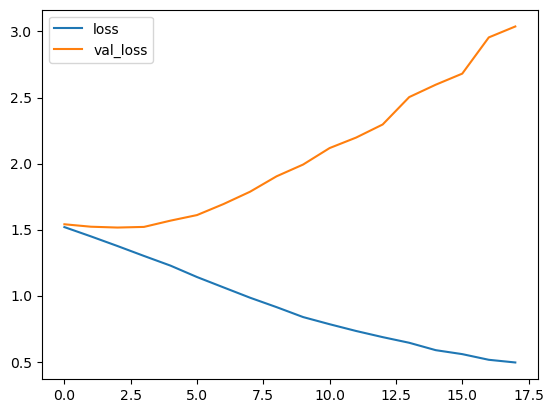

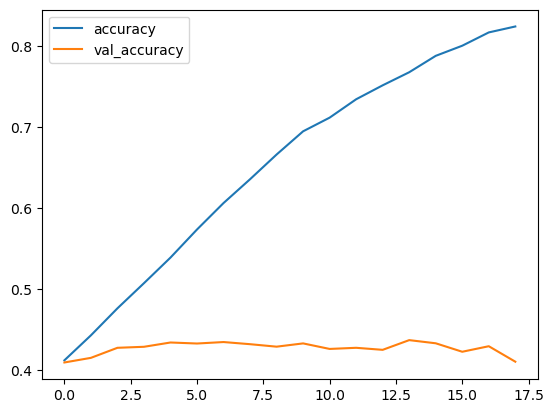

In [19]:
history_frame = pd.DataFrame(history_resnet.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [20]:
model_resnet_json = model_resnet.to_json()
with open('data/model_resnet.json', 'w') as json_file:
    json_file.write(model_resnet_json)

model1.save_weights('data/model_resnet_weights.h5')